--------------------------------------------
new image
[[[179 132  52]
  [157 113  30]
  [156 112  23]
  ...
  [100  55  12]
  [100  56   9]
  [100  56   9]]

 [[214 173  47]
  [226 182  66]
  [201 153  49]
  ...
  [ 99  48  31]
  [ 97  50  23]
  [ 95  48  21]]

 [[169 123  49]
  [178 135  53]
  [190 151  58]
  ...
  [103  57  34]
  [ 89  50  18]
  [ 89  50  18]]

 ...

 [[ 55  48  29]
  [ 43  35  18]
  [ 50  40  27]
  ...
  [ 58  49  40]
  [ 46  38  31]
  [ 35  28  19]]

 [[ 15   7   1]
  [ 45  38  30]
  [ 73  66  57]
  ...
  [ 12   7   4]
  [ 21  15  11]
  [ 27  24  16]]

 [[ 14   8   1]
  [ 31  25  18]
  [ 23  17  10]
  ...
  [ 10   5   2]
  [ 11   6   3]
  [ 11   6   3]]]
--------------------------------------------
--------------------------------------------
all coordinates 2d
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23),

/var/folders/3s/s_cfgxk120b8xn2g6y1m9psw0000gn/T/ipykernel_20328/2806513868.py:105: RuntimeWarning: overflow encountered in scalar subtract
  (b2 - b1) ** 2)) ** 0.5
/var/folders/3s/s_cfgxk120b8xn2g6y1m9psw0000gn/T/ipykernel_20328/2806513868.py:104: RuntimeWarning: overflow encountered in scalar subtract
  (g2 - g1) ** 2 +
/var/folders/3s/s_cfgxk120b8xn2g6y1m9psw0000gn/T/ipykernel_20328/2806513868.py:103: RuntimeWarning: overflow encountered in scalar subtract
  curr_dist = (((r2 - r1) ** 2 +


--------------------------------------------
reference point (mean value)
(130.44444444444446, 152.61111111111111, 230.66666666666666)
--------------------------------------------
--------------------------------------------
closest value
[108 148 229]
--------------------------------------------
--------------------------------------------
reference point (mean value)
(179.66666666666666, 129.11111111111111, 58.55555555555556)
--------------------------------------------
--------------------------------------------
closest value
[172 127  68]
--------------------------------------------
--------------------------------------------
new means
[array([10.84210526,  7.21052632,  4.73684211]), array([129.26315789, 152.36842105, 230.57894737]), array([179.26315789, 129.        ,  59.05263158])]
--------------------------------------------
--------------------------------------------
reference point (mean value)
(10.842105263157896, 7.2105263157894735, 4.7368421052631575)
-------------------

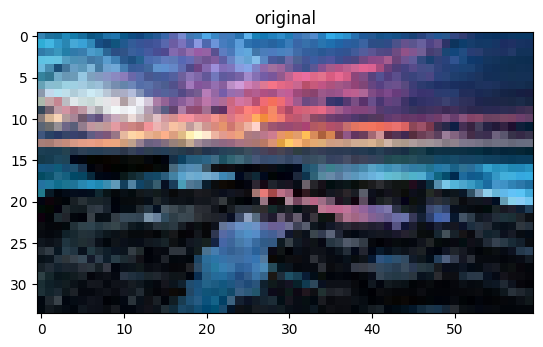

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(34, 60, 3)


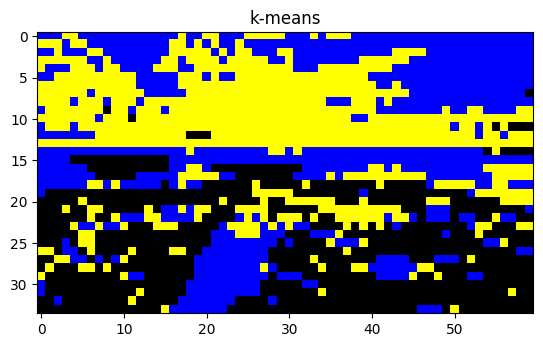

In [40]:
import random
import itertools
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Define N of clusters
# Choose N points randomly as centroids for clusters
# Compare all points against the centroids, by intensity, until we find the closest one, add them to the clusters
# Calculate new centroid
# Continue until all points have been classified

def debug(thing, title):
    print('--------------------------------------------')
    print(title)
    print(thing)
    print('--------------------------------------------')


def display_imgs(imgs, titles):

    for ind, img in enumerate(imgs):
        print(img.shape)
        if len(img.shape) > 2:
            b,g,r = cv.split(img)
            img = cv.merge((r,g,b))
            plt.imshow(img)
        else:
            plt.imshow(img, cmap='gray')
        plt.title(titles[ind])
        plt.show()


img_color_int = cv.imread('beach.jpeg')

img = cv.resize(img_color_int, (60, 34))


# img_gray_int = cv.cvtColor(img_color_int, cv.COLOR_BGR2GRAY)
# img_gray_float = np.float32(img_gray_int / 255)

# img_color_float = np.float32(img_color_int / 255)
# x, y, z = img_color_float.shape


# K-means implementation for image segmentation by hand.
n = 3

# img = np.array([
#     [[200,  200,  200],
#      [190, 180, 200]],
#      [[200, 170, 200],
#       [100, 80, 90]],
#      [[120, 90, 100],
#       [100, 120, 90]],
#       [[0, 3, 7],
#        [1, 11, 11]]])


debug(img, 'new image')

# Homework asks for the algorithm to be tailored for color images.
rows, cols, channels = img.shape

coordinates = itertools.product(list(range(rows)), list(range(cols)))
coordinates = [coordinate for coordinate in coordinates]
debug(coordinates, 'all coordinates 2d')

# means positions
#means_pos = random.sample(coordinates, n)
#means_pos = [(0, 0), (1, 1), (3, 1)]
means_pos = [(15, 10), (10, 25), (0, 0)]

debug(means_pos, 'initial means positions')
means =[img[x, y, :] for x, y in means_pos]
debug(means, 'initial means')

clusters = [[mean] for mean in means]
debug(clusters, 'initial clusters')
marked = {ind: [mean_pos] for ind, mean_pos in enumerate(means_pos)}
debug(marked, 'initial marked')

# marked positions
marked_poses = []
for pos_list in marked.values():
    marked_poses += pos_list


while len(marked_poses) < rows * cols:
    for cluster_ind, mean in enumerate(means):
        if len(marked_poses) == rows * cols:
            break
        r1, g1, b1 = mean[0], mean[1], mean[2]
        min_dist = float('Inf')
        for i in range(rows):
            for j in range(cols):
                # My interpreation of the distance between 2 points is the
                # Euclidean distance between the intensities
                # (r2 - r1) ^ 2 + (g2 - g1) ^ 2 + (b2 - b1) ^ 2
                if (i, j) in marked_poses:
                    continue
                r2, g2, b2 = img[i, j, :]
                curr_dist = (((r2 - r1) ** 2 + 
                            (g2 - g1) ** 2 + 
                            (b2 - b1) ** 2)) ** 0.5
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    # Similar point coordinate
                    spt_coordinate = (i, j)
        debug((r1, g1, b1), 'reference point (mean value)')

        marked[cluster_ind] += [spt_coordinate]
        marked_poses = []
        for pos_list in marked.values():
            marked_poses += pos_list
        #debug(marked, 'clusters')
        #debug(marked_poses, 'positions')

        debug(img[spt_coordinate[0], spt_coordinate[1], :], 'closest value')
        clusters[cluster_ind] += [img[spt_coordinate[0], spt_coordinate[1], :]]


    # After the closest points have been added to the clusters, we 
    # re-calculate the means
    means =  [np.average(intensity_cluster, axis=0) for intensity_cluster in clusters]
    debug(means, 'new means')

debug(marked, 'cluster positions')

color_list = [
    (0, 0, 0),
    (0, 50, 255),
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (0, 255, 255),
    (255, 0, 255),]

used_colors = color_list[:n]

new_img = np.zeros(img.shape)
for i in range(n):
    r, g, b = used_colors[i]
    # Gives me all the positions for this cluster.
    for pos in marked[i]:
        new_img[pos[0], pos[1], 0] = r
        new_img[pos[0], pos[1], 1] = g
        new_img[pos[0], pos[1], 2] = b

display_imgs([img, new_img], ['original', 'k-means'])